## ⚒ **Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from torch import nn, optim
from sklearn.datasets import fetch_covtype
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

## **Part 1: Install Dataset**

In [ ]:
covertype = fetch_covtype()

datas = covertype.data
labels = covertype.target

In [ ]:
print(datas)
print(labels)

[[2.596e+03 5.100e+01 3.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.590e+03 5.600e+01 2.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.804e+03 1.390e+02 9.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [2.386e+03 1.590e+02 1.700e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.384e+03 1.700e+02 1.500e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.383e+03 1.650e+02 1.300e+01 ... 0.000e+00 0.000e+00 0.000e+00]]
[5 5 2 ... 3 3 3]


In [ ]:
print(f"Data shape: {datas.shape}")
print(f"Number of classes: {len(np.unique(labels))}")
print(f"Number of features: {len(covertype.feature_names)}")
print(f"Features: {covertype.feature_names}")

Data shape: (581012, 54)
Number of classes: 7
Number of features: 54
Features: ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_0', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Soil_Type_0', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_

In [ ]:
df = pd.DataFrame(datas,columns=covertype.feature_names)
df["Cover Type"] = labels

print("Dataset INFO")
print(f"Total samples: {len(df):,}")
print(f"Features: {datas.shape[1]}")
print(f"Classes: {np.unique(labels)}")
print(f"Data Shape: {df.shape}")
print(f"Columns: {df.columns}")

print("Class percentage")
class_count = df["Cover Type"].value_counts().sort_index()
for i, count in class_count.items():
    percentage = count*100/len(df)
    print(f"Class {i}: {count} samples ({percentage:.1f}%)")


Dataset INFO
Total samples: 581,012
Features: 54
Classes: [1 2 3 4 5 6 7]
Data Shape: (581012, 55)
Columns: Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_0',
       'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3',
       'Soil_Type_0', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3',
       'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7',
       'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11',
       'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15',
       'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19',
       'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23',
       'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27',
       'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soi

In [ ]:
print("Missing Value")
missval_count = df.isnull().sum()
print(f"Total missing value: \n{missval_count}")

Missing Value
Total missing value: 
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_0                     0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Soil_Type_0                           0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil

## **Part 2: EDA**

/tmp/ipython-input-8-3569850999.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Cover Type', palette='Set2')


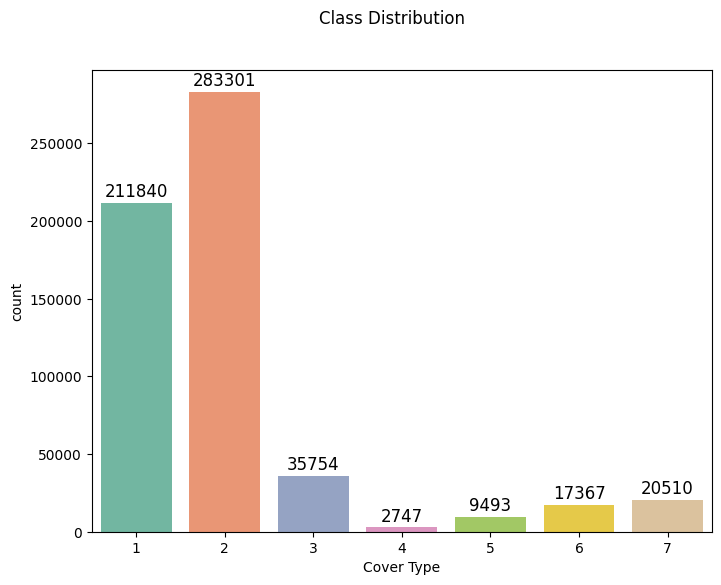

In [ ]:
train_counts = df['Cover Type'].value_counts()
fig = plt.figure(figsize=(8,6))
plt.suptitle("Class Distribution")
ax = sns.countplot(data=df, x='Cover Type', palette='Set2')
plt.xlabel("Cover Type")
for p in ax.patches:
  ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                fontsize=12, color='black',
                xytext=(0, 8), textcoords='offset points')
plt.show()

In [ ]:
train_df, temp_df = train_test_split(df, test_size=0.3,random_state=42,stratify=df["Cover Type"])
test_df, val_df = train_test_split(temp_df, test_size=0.5,random_state=42,stratify=temp_df["Cover Type"])
print(f"Train: {len(train_df)} | Test: {len(test_df)} | Val: {len(val_df)}")

X_train, X_test, y_train, y_test = train_test_split(datas, labels, test_size=0.2, random_state=42,stratify=labels)
print(X_train.shape)

Train: 406708 | Test: 87152 | Val: 87152
(464809, 54)


In [ ]:
#Chuẩn hóa dữ liệu cho MLP và SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
split_count = pd.DataFrame(
    {
        "Dataset": ["Train","Test","Val"],
        "len" : [train_df["Cover Type"].value_counts().sum(), test_df["Cover Type"].value_counts().sum(), val_df["Cover Type"].value_counts().sum()]
    }
)
print(split_count)
fig = px.bar(
    split_count,
    title="Split Distribution",
    labels={
        "len":"Number of sample"
    },
    x="Dataset",
    y="len",
    color_discrete_map={"Train":"skyblue","Test": "orangered","Val": "green"},
    color="Dataset",
    text="len"
)
fig.update_traces(texttemplate="%{text}",textposition="outside",marker=dict(line=dict(width=1,color="black")))
fig.show()

  Dataset     len
0   Train  406708
1    Test   87152
2     Val   87152


In [ ]:
train_labels = pd.Series(train_df["Cover Type"]).value_counts().sort_index()
test_labels = pd.Series(test_df["Cover Type"]).value_counts().sort_index()
val_labels = pd.Series(val_df["Cover Type"]).value_counts().sort_index()
split_labels = pd.DataFrame(
    {
        "Dataset": ["Train"]*len(train_df['Cover Type'].unique()) + ["Test"]*len(test_df['Cover Type'].unique()) + ["Val"]*len(val_df['Cover Type'].unique()),
        "Class": list(train_labels.index) +  list(test_labels.index) + list(val_labels.index),
        "Count": list(train_labels.values) + list(test_labels.values) + list(val_labels.values)
    }
)
print(split_labels)

   Dataset  Class   Count
0    Train      1  148288
1    Train      2  198310
2    Train      3   25028
3    Train      4    1923
4    Train      5    6645
5    Train      6   12157
6    Train      7   14357
7     Test      1   31776
8     Test      2   42495
9     Test      3    5363
10    Test      4     412
11    Test      5    1424
12    Test      6    2605
13    Test      7    3077
14     Val      1   31776
15     Val      2   42496
16     Val      3    5363
17     Val      4     412
18     Val      5    1424
19     Val      6    2605
20     Val      7    3076


In [ ]:
fig = px.bar(
    split_labels,
    title="Class Distribution",
    x="Class",
    y="Count",
    color="Dataset",
    barmode="group",
    labels={
        "Class": "Cover Type",
        "Count": "Numeber of sample"
    },
    text="Count"
)
fig.update_traces(texttemplate="%{text}",textposition="outside")
fig.show()

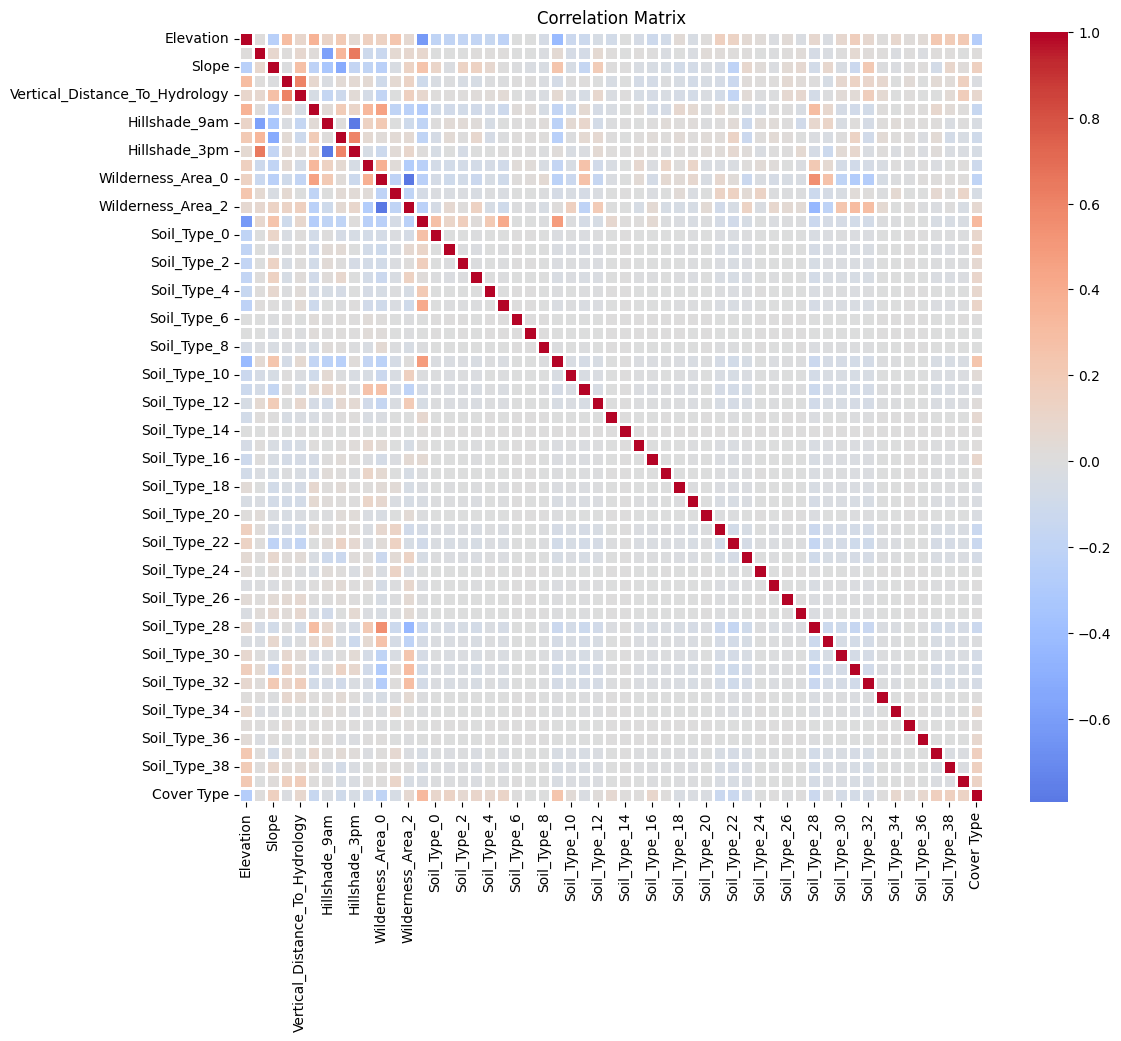

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm",linewidths=1.0,center=0)
plt.title("Correlation Matrix")
plt.show()

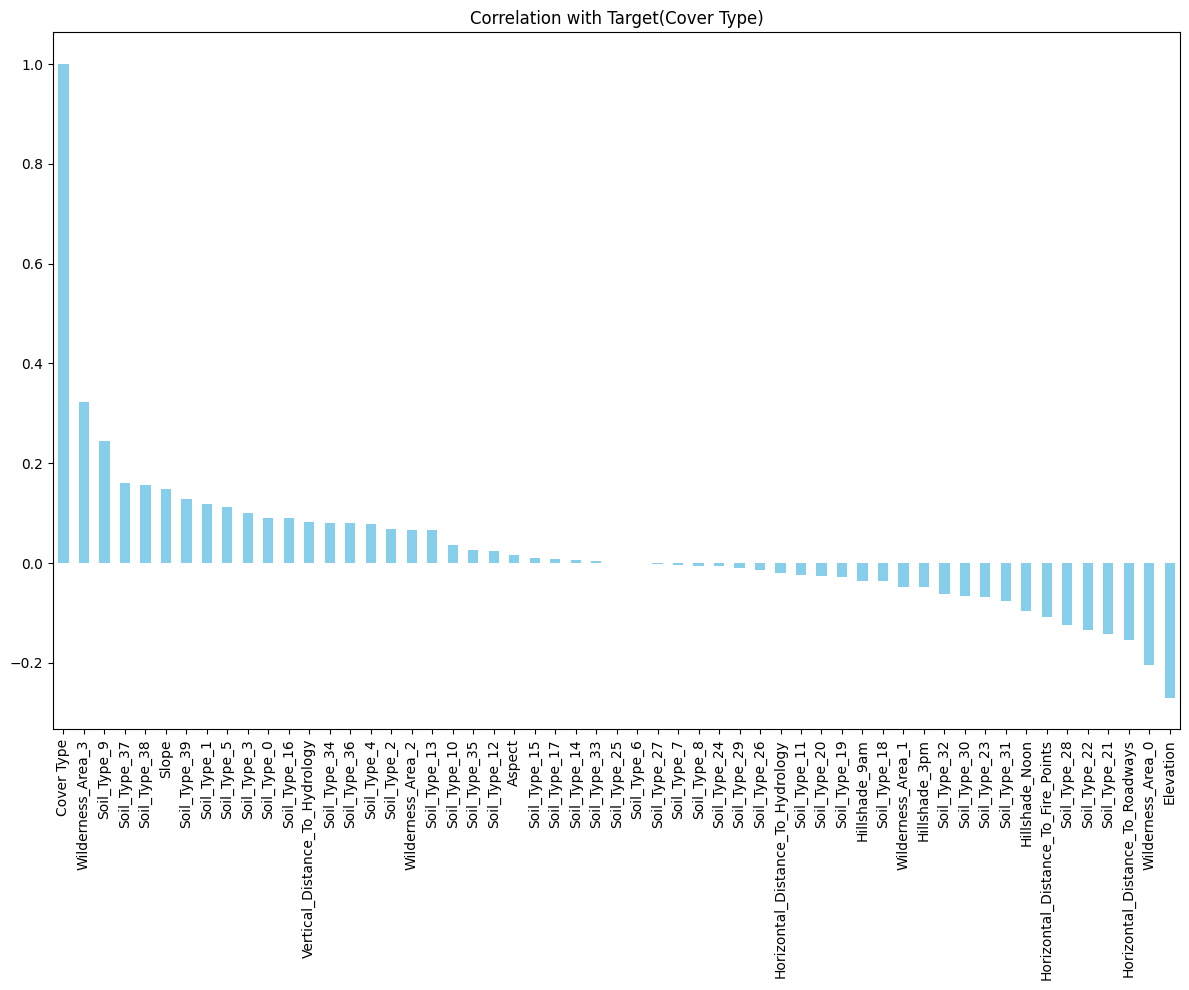

In [ ]:
target_correlation = correlation_matrix['Cover Type'].sort_values(ascending=False)
plt.figure(figsize=(12,10))
plt.ylabel="Correlation"
target_correlation.plot(kind="bar",color="skyblue")
plt.title("Correlation with Target(Cover Type)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
model_dict = {
    "Decision Tree" : DecisionTreeClassifier(
        random_state=42,
        max_depth=20,
        min_samples_split=20,
        min_samples_leaf=10
    ),
    "Random Forest": RandomForestClassifier(
        random_state=42,
        n_estimators=100,
        max_depth=20,
        min_samples_split=20,
        n_jobs=-1
    ),
    "SVM" : SVC(
        kernel="rbf",
        random_state=42,
        probability=True
    ),
    "MLP" : MLPClassifier(
        hidden_layer_sizes=(100,50),
        random_state=42,
        max_iter=500,
        early_stopping=True,
        validation_fraction=0.2
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        random_state=42,
        n_estimators=100,
        learning_rate=0.01,
        max_depth=2
    )
}

print("Model in used")
for model in model_dict.keys():
  print(f"- {model}")

Model in used
- Decision Tree
- Random Forest
- SVM
- MLP
- Gradient Boosting


In [ ]:
res = {}
prediction = {}

n_sample = 10000
indices = np.random.choice(X_train.shape[0],n_sample,replace=False)
X_train_sample = X_train[indices]
y_train_sample = y_train[indices]

In [ ]:
for name, model in model_dict.items():
  print(f"Training {name}")
  try:
    if name in ["SVM","MLP"]:
      if name == "SVM":
        model.fit(X_train_sample,y_train_sample)
        y_pred = model.predict(X_test_scaled)
      else:
        model.fit(X_train_scaled,y_train)
        y_pred = model.predict(X_test_scaled)
    else:
      model.fit(X_train,y_train)
      y_pred = model.predict(X_test)

    acc = accuracy_score(y_test,y_pred)
    res[name] = acc
    prediction[name] = y_pred

    print(f"-> ACcuracy: {acc:.4f}")
  except Exception as e:
    print(f"Error: {e}")
    res[name] = 0
    prediction[name] = np.zeros(len(y_test))

Training Decision Tree
-> ACcuracy: 0.8928
Training Random Forest
-> ACcuracy: 0.8811
Training SVM
-> ACcuracy: 0.0615
Training MLP
-> ACcuracy: 0.9059
Training Gradient Boosting
-> ACcuracy: 0.6791


## **Model Evaluation**


📋 Classification Reports:
----------------------------------------
Model: MLP Classification Report
----------------------------------------


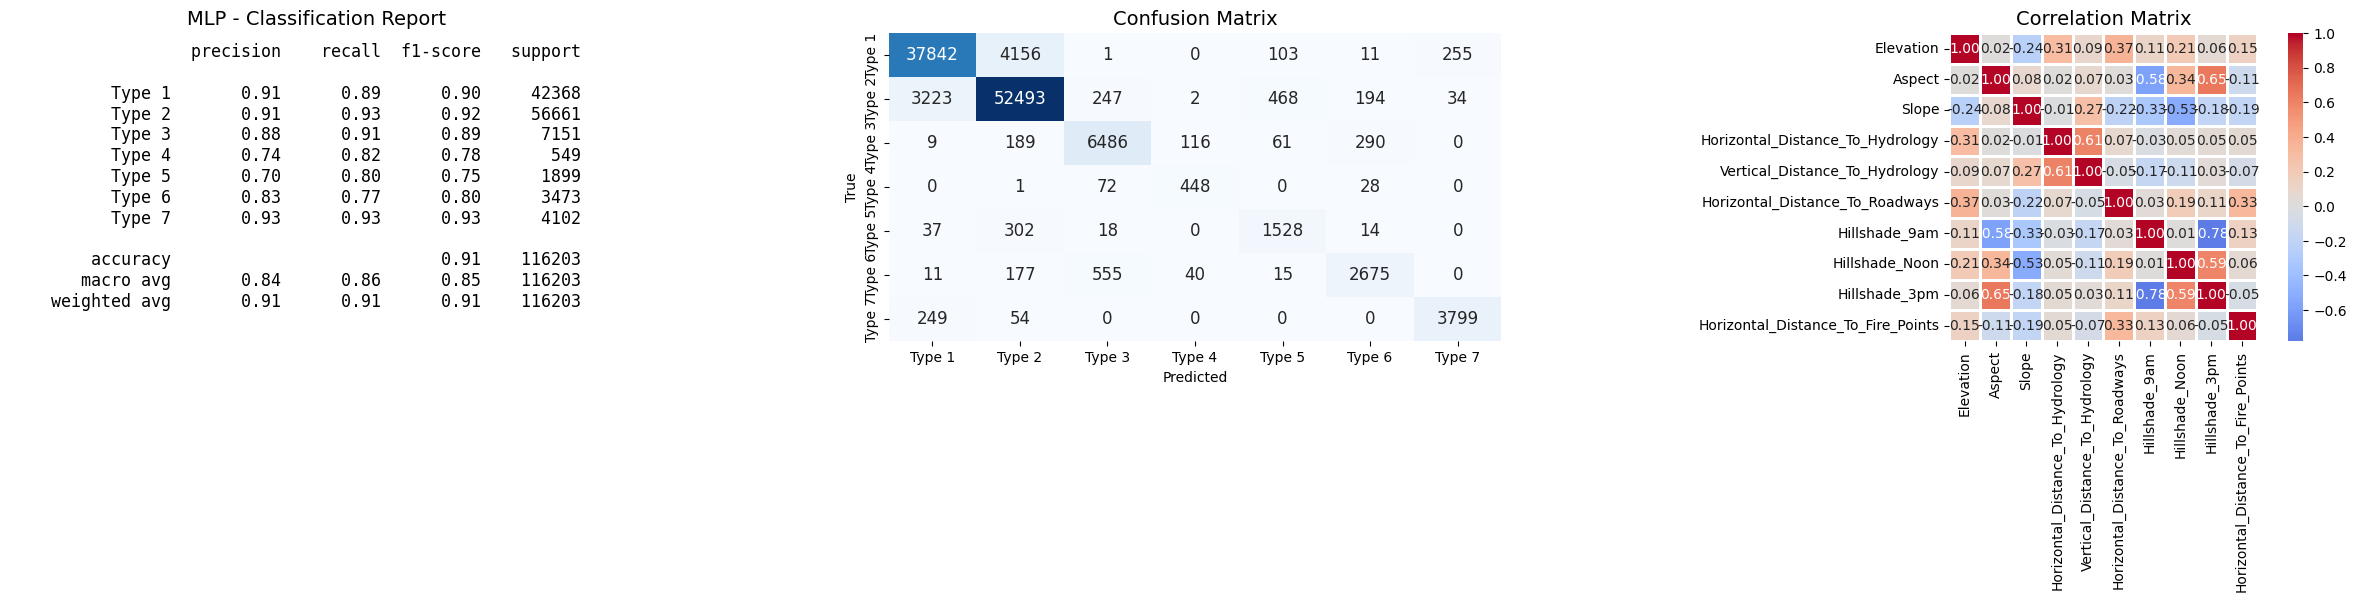

Model: Decision Tree Classification Report
----------------------------------------


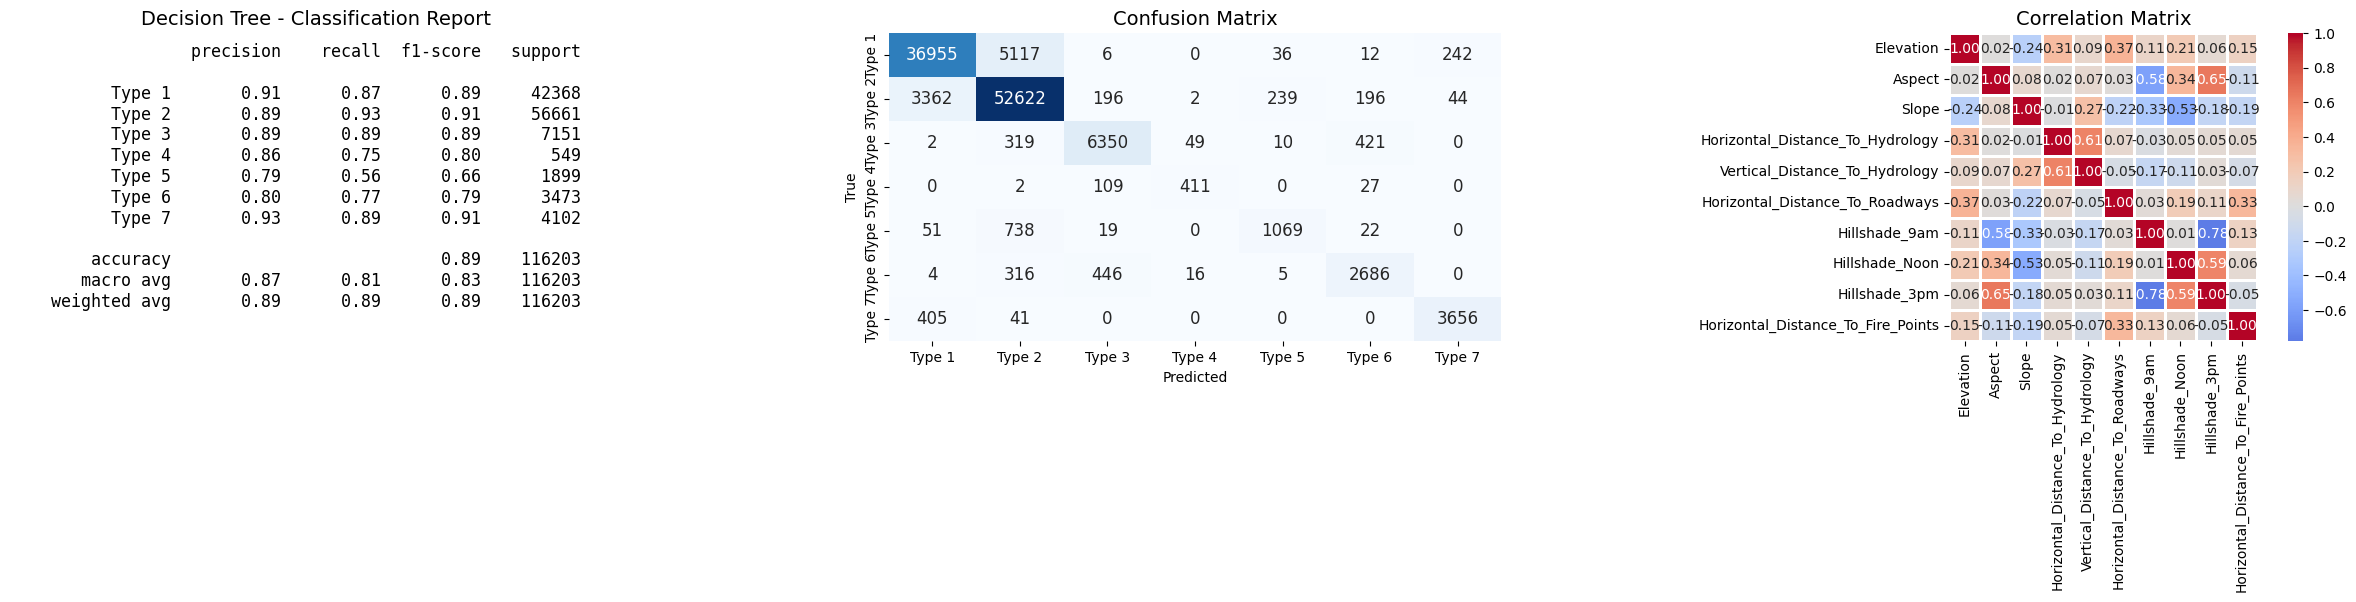

Model: Random Forest Classification Report
----------------------------------------


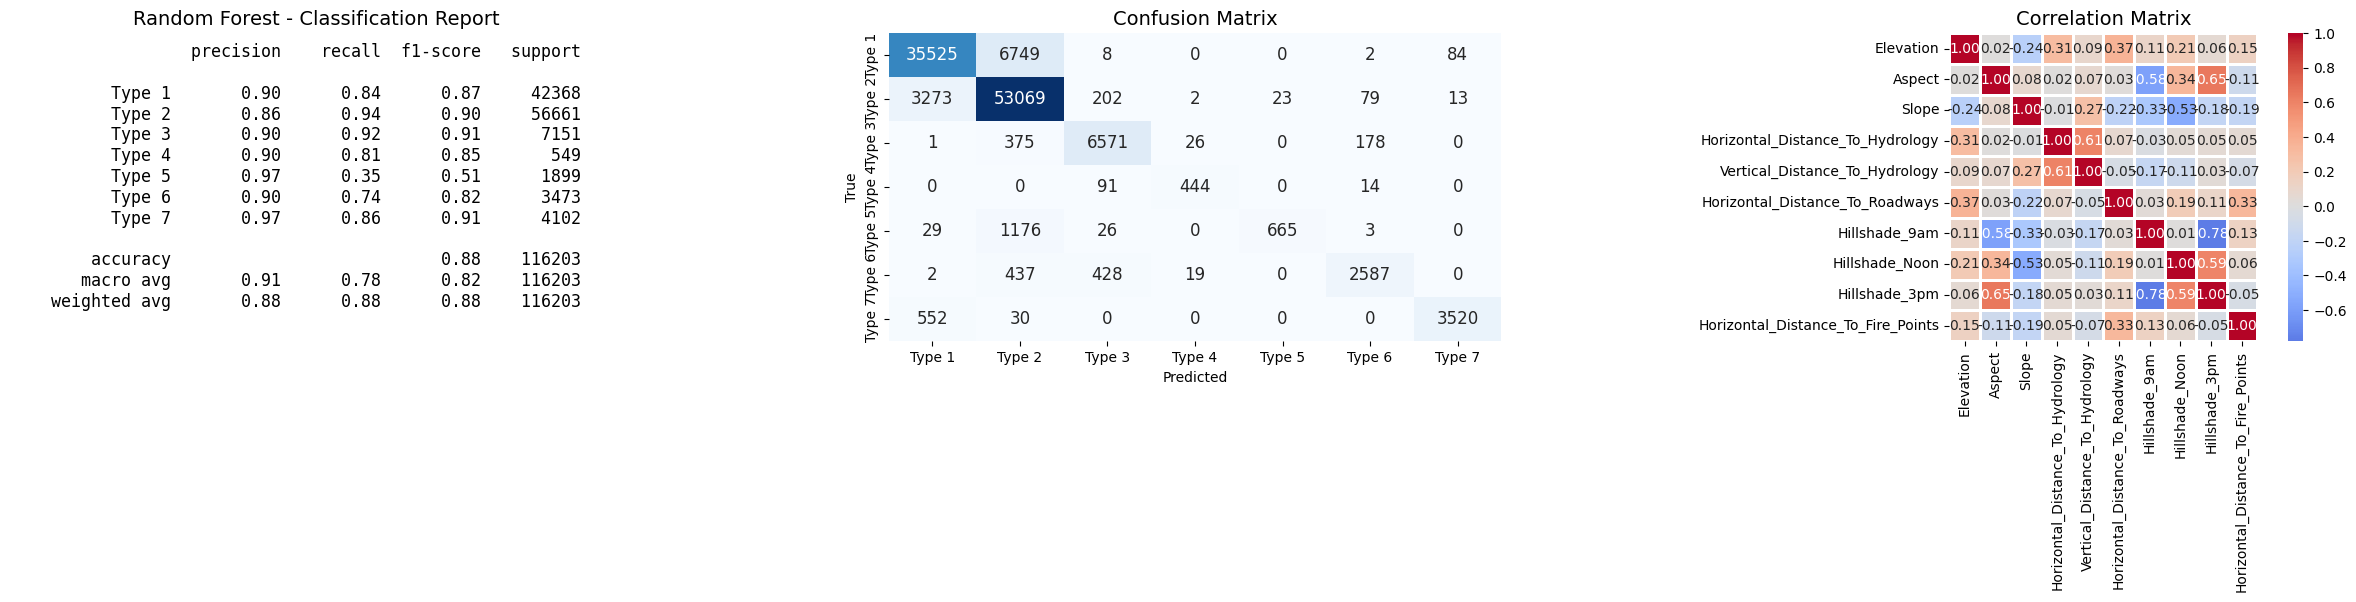

Model: Gradient Boosting Classification Report
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

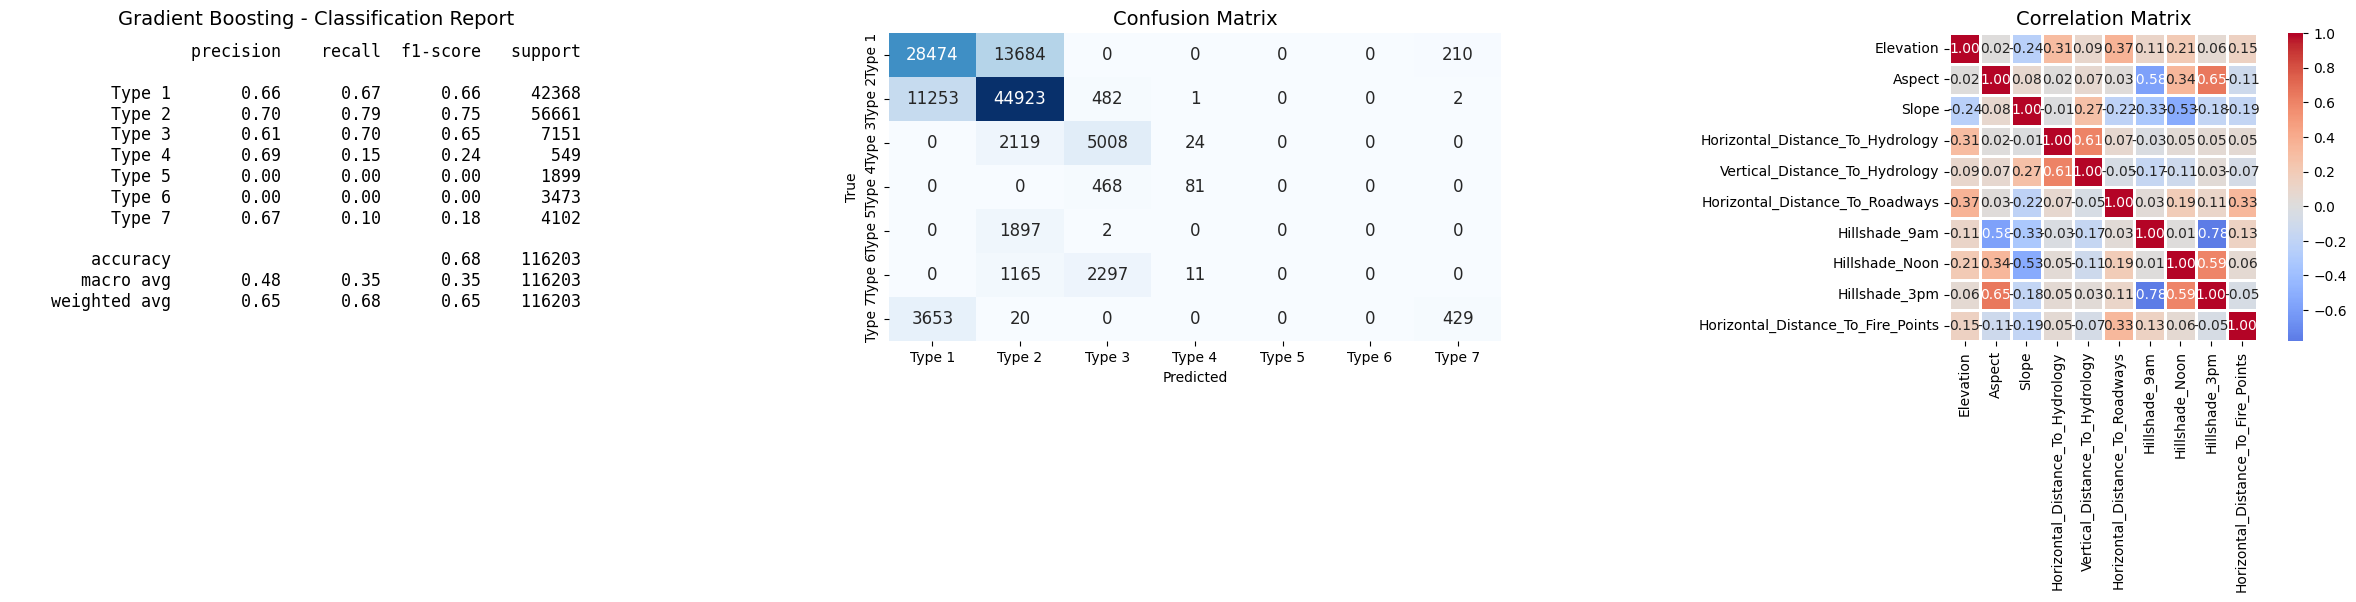

Model: SVM Classification Report
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

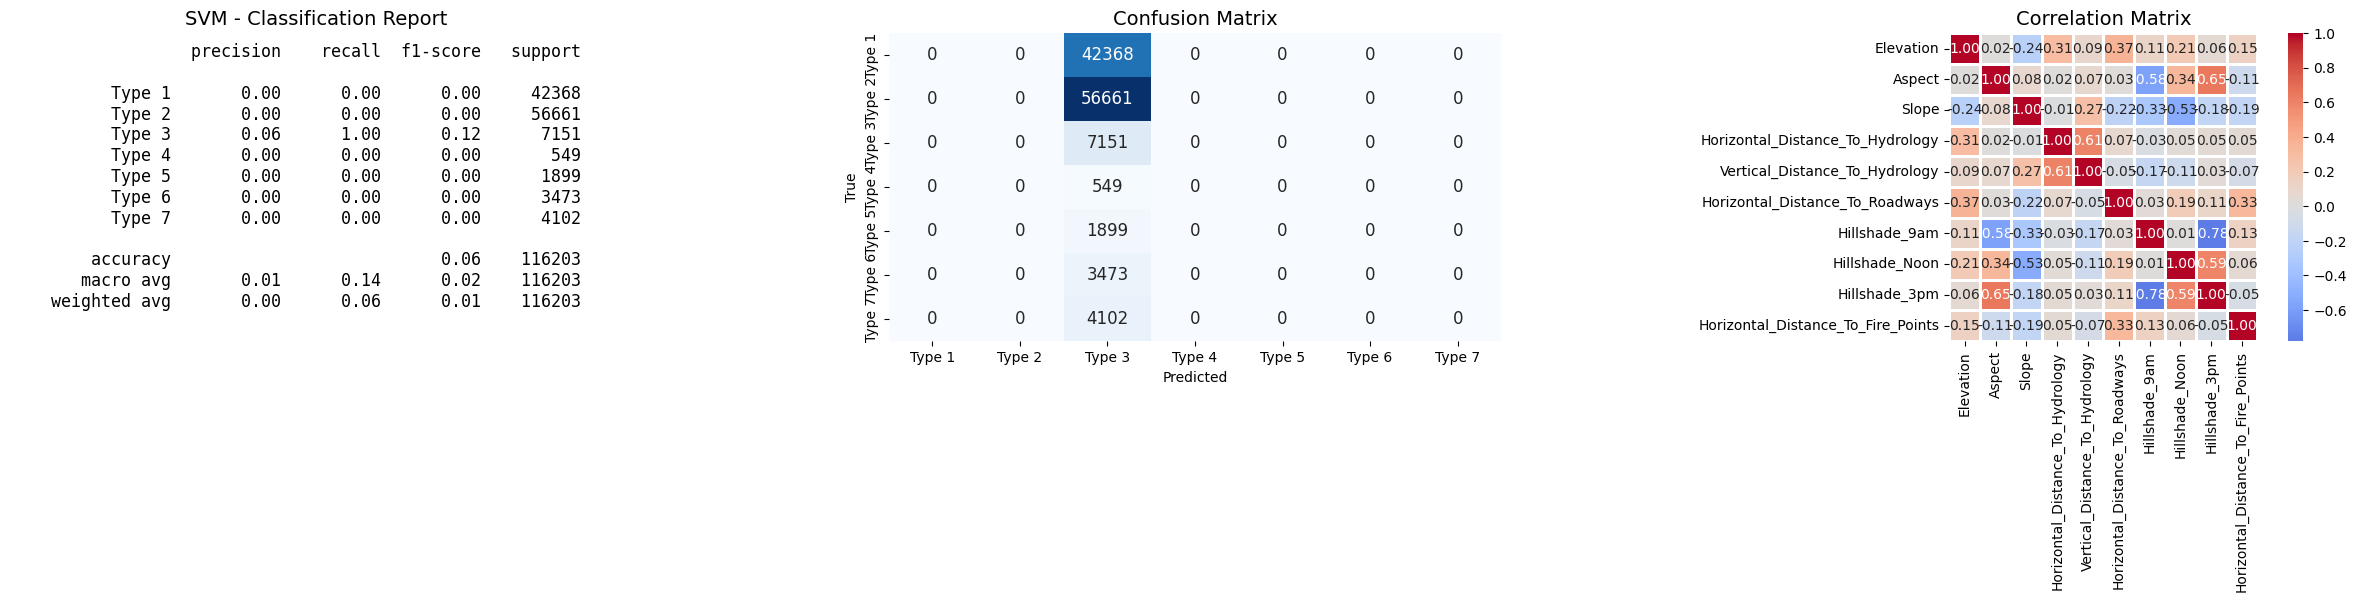

In [ ]:
print("\n📋 Classification Reports:")
print("-" * 40)

for name, model_acc in sorted(res.items(), key=lambda x: x[1],reverse=True):
  print(f"Model: {name} Classification Report")
  print('-'*40)

  report = classification_report(y_test,prediction[name],target_names=[f"Type {i}" for i in range(1,8)], output_dict=True)

  fig, axes = plt.subplots(1,3,figsize=(24,6))

  #LEFT: Classification Report
  axes[0].axis('off')
  axes[0].text(0.5,0.5,classification_report(y_test,prediction[name],target_names=[f"Type {i}" for i in range(1,8)]),
                                             ha="center",va="center",fontsize=12,font="monospace")
  #RIGT: Confusion matrix
  cm= confusion_matrix(y_test,prediction[name])
  sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",cbar=False,ax=axes[1],xticklabels=[f"Type {i}" for i in range(1,8)],yticklabels=[f"Type {i}" for i in range(1,8)],
              annot_kws={'size': 12})
  axes[1].set_title("Confusion Matrix",fontsize=14)
  axes[1].set_xlabel("Predicted")
  axes[1].set_ylabel("True")

  #RIGHTMOST: Correlation Matrix for the first 10 features
  correlation_matrix = df.iloc[:,:10].corr()
  sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",linewidths=1.0,center=0,ax=axes[2],fmt=".2f",square=True,cbar=True)
  axes[2].set_title("Correlation Matrix",fontsize=14)

  #__________________________________________________________________________________________________________________________________________________

  axes[0].set_title(f'{name} - Classification Report', fontsize=14)
  plt.tight_layout()
  plt.show()


In [ ]:
model_comparison = {}

for model_name in res.keys():
  acc = accuracy_score(y_test,prediction[model_name])
  precision = precision_score(y_test,prediction[model_name],average="weighted")
  recall = recall_score(y_test,prediction[model_name],average="weighted")
  f1 = f1_score(y_test,prediction[model_name],average="weighted")

  model_comparison[model_name] = {
      "Accuracy": acc,
      "Precision": precision,
      "Recall": recall,
      "F1-Score": f1
  }

comparison_df = pd.DataFrame(model_comparison).T

comparison_df = comparison_df.sort_values(by="F1-Score",ascending=False)
print(comparison_df)

                   Accuracy  Precision    Recall  F1-Score
MLP                0.905923   0.906400  0.905923  0.905982
Decision Tree      0.892825   0.892524  0.892825  0.892011
Random Forest      0.881053   0.883991  0.881053  0.878530
Gradient Boosting  0.679113   0.646830  0.679113  0.653339
SVM                0.061539   0.003787  0.061539  0.007135


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
class_report = classification_report(y_test,prediction[model_name],output_dict=True)
f1 = {int(i): class_report[str(i)]["f1-score"] for i in range(1,8)}
f1_df = pd.DataFrame(list(f1.items()),columns=['Class','F1-score'])

top_3 = f1_df.nlargest(3,'F1-score')
bottom_3 = f1_df.nsmallest(3,'F1-score')

print("Top 3 Classes with Highest F1-Score")
print(top_3)
print("Bottom 3 Classes with Lowest F1-Score")
print(bottom_3)

Top 3 Classes with Highest F1-Score
   Class  F1-score
1      2  0.745802
0      1  0.664132
2      3  0.650052
Bottom 3 Classes with Lowest F1-Score
   Class  F1-score
4      5  0.000000
5      6  0.000000
6      7  0.180898


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

